In [2]:
import pandas as pd
from sodapy import Socrata
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
client = Socrata("data.cityofnewyork.us", None)
result = client.get("mh6y-g6wt", limit=5000)
results_df = pd.DataFrame.from_records(result)

In [4]:
#There are a few different cohort categroies. To standardize the dataset, we only use the "4 Year June" cohort of each year
std_cohort = results_df[results_df['cohort_category']=='4 Year  June']
#We only need the information for black student
std_cohort = std_cohort[results_df['demographic']=='Black']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [5]:
std_cohort['total_grads_pct_of_cohort'] = std_cohort['total_grads_pct_of_cohort'].str.rstrip('%').astype('float') / 100

In [6]:
std_cohort['total_grads_num']= std_cohort['total_grads_num'].str.replace(',','').astype('int')

In [7]:
borough = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
color =['blue','black','yellow','green','grey']

In [8]:
bronx = std_cohort[std_cohort['borough'] == 'Bronx']

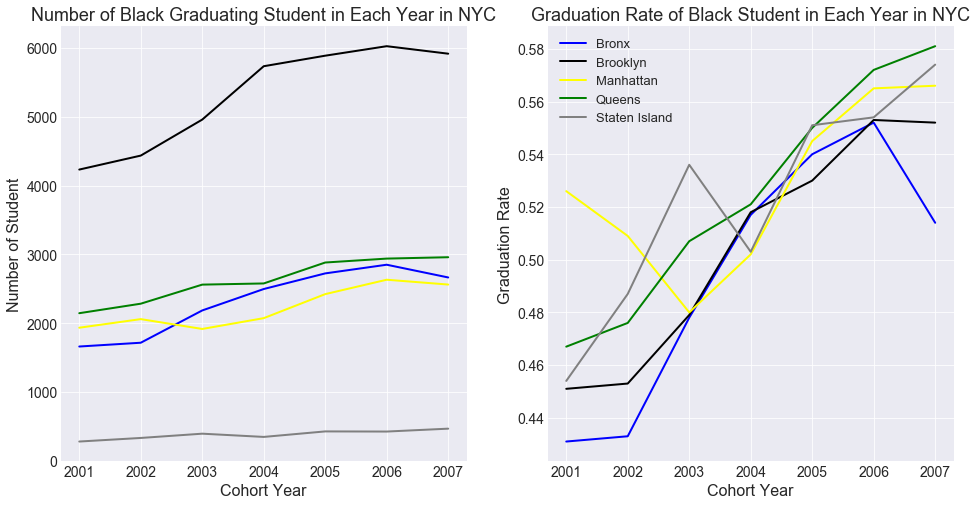

In [13]:
fig, axs = plt.subplots(1,2,figsize = (16,8))
    
for num in range(5):
    b = borough[num]
    c = color[num]
    borough_df = std_cohort[std_cohort['borough'] == b]
    
    axs[0].plot(borough_df.cohort_year, borough_df.total_grads_num, color=c, alpha=1,lw=2)
    axs[1].plot(borough_df.cohort_year, borough_df.total_grads_pct_of_cohort, color=c, alpha=1,lw=2)

axs[0].set_xlabel('Cohort Year',fontsize=16)
axs[1].set_xlabel('Cohort Year',fontsize=16)
axs[0].set_ylabel('Number of Student',fontsize=16)
axs[1].set_ylabel('Graduation Rate',fontsize=16)

axs[0].set_title('Number of Black Graduating Student in Each Year in NYC',fontsize=18)
axs[1].set_title('Graduation Rate of Black Student in Each Year in NYC',fontsize=18)
axs[0].tick_params( labelsize = 14)
axs[1].tick_params( labelsize = 14)
plt.style.use('seaborn-darkgrid')
plt.legend(borough,fontsize=13)

Figure 1. The left subplot shows the total number of black student graduating from college each year in NYC is growing contantly form 2001 to 2006. However, in 2007, this number dropped in Bronx, Manhattan, and Brooklyn. The same situation is also refleced on the right subplot. Although the graduation rate of black student in NYC is increasly significantly from 2001 to 2006, the graduation rate in Bronx, Mahattan and Brooklyn also decreased in 2017. 